In [3]:
import pandas as pd
import numpy as np
import scipy.stats

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
site=pd.read_csv('df.csv')

In [6]:
site.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420245 entries, 0 to 420244
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   index               420245 non-null  int64 
 1   ga:country          420245 non-null  object
 2   ga:pagePath         420245 non-null  object
 3   ga:landingPagePath  420245 non-null  object
 4   ga:secondPagePath   420245 non-null  object
 5   ga:exitPagePath     420245 non-null  object
 6   ga:pageviews        420245 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 22.4+ MB


In [7]:
site['ga:pageviews'].sum()

761005

In [8]:
site['ga:landingPagePath']=site['ga:landingPagePath'].str.rsplit("app/*", n=1, expand=True)
site

,index,ga:country,ga:pagePath,ga:landingPagePath,ga:secondPagePath,ga:exitPagePath,ga:pageviews
0,241911,Russia,127.0.0.1/accounts/password/reset/,127.0.0.1/accounts/login/,127.0.0.1/accounts/login/,127.0.0.1/accounts/login/,1
1,241910,Russia,127.0.0.1/accounts/login/,127.0.0.1/accounts/login/,127.0.0.1/accounts/login/,127.0.0.1/accounts/login/,25
2,181421,Russia,84.53.242.184/accounts/login/,84.53.242.184/accounts/login/,84.53.242.184/accounts/login/,84.53.242.184/accounts/login/,4
3,181420,Russia,84.53.242.184/accounts/login/,84.53.242.184/accounts/login/,84.53.242.184/accounts/login/,84.53.242.184/accounts/login/,2
4,182674,Russia,hq.asodesk.com/ru/,alpha.asodesk.com/accounts/login/,alpha.asodesk.com/accounts/login/,hq.asodesk.com/settings/billing/,1
...,...,...,...,...,...,...,...
420240,416944,Russia,zeta.asodesk.com/accounts/signup/,zeta.asodesk.com/accounts/login/,zeta.asodesk.com/accounts/login/,zeta.asodesk.com/accounts/verify/,1
420241,416939,Russia,zeta.asodesk.com/accounts/login/,zeta.asodesk.com/accounts/login/,zeta.asodesk.com/accounts/login/,zeta.asodesk.com/accounts/verify/,2
420242,416947,Russia,zeta.asodesk.com/accounts/login/,zeta.asodesk.com/accounts/logout/,zeta.asodesk.com/accounts/logout/,zeta.asodesk.com/accounts/login/,1
420243,416948,Russia,zeta.asodesk.com/accounts/logout/,zeta.asodesk.com/accounts/logout/,zeta.asodesk.com/accounts/logout/,zeta.asodesk.com/accounts/login/,1


In [9]:
dc=pd.DataFrame(site.groupby(['ga:country','ga:landingPagePath','ga:exitPagePath'])['ga:pageviews'].sum()).sort_values(by='ga:pageviews', ascending=False).reset_index()
dc

,ga:country,ga:landingPagePath,ga:exitPagePath,ga:pageviews
0,Russia,hq.asodesk.com/ru/app,hq.asodesk.com/ru/app,48047
1,Russia,hq.asodesk.com/us/app,hq.asodesk.com/us/app,27072
2,Belarus,hq.asodesk.com/us/app,hq.asodesk.com/us/app,11591
3,Russia,asodesk.com/,hq.asodesk.com/ru/,11411
4,Ukraine,hq.asodesk.com/us/app,hq.asodesk.com/us/app,11150
...,...,...,...,...
16009,Germany,asodesk.com/blog/recap-of-the-app-promotion-su...,asodesk.com/blog/recap-of-the-app-promotion-su...,1
16010,Germany,asodesk.com/blog/recap-of-app-promotion-summit...,asodesk.com/slack-group,1
16011,Germany,asodesk.com/blog/new-tools-missing-competitor-...,asodesk.com/blog/new-tools-missing-competitor-...,1
16012,Ukraine,hq.asodesk.com/de/app,hq.asodesk.com/se/app,1


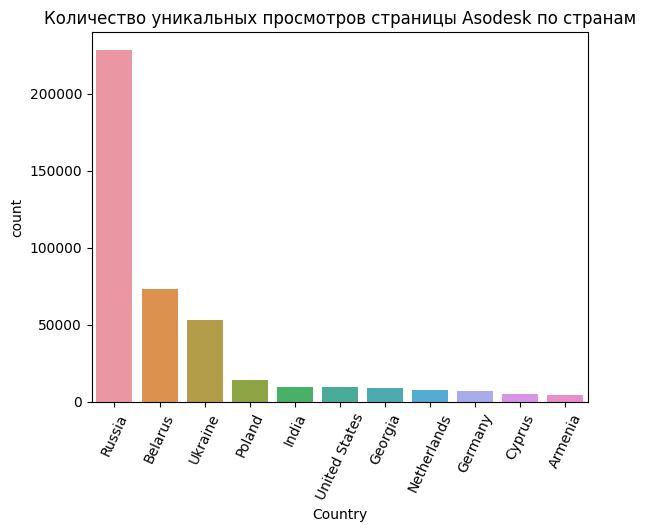

In [65]:
fig = plt.figure()
#ax = fig.add_subplot(111)
ax=sns.countplot(data=site, x="ga:country",order = site['ga:country'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 65)
ax.set(title='Количество уникальных просмотров страницы Asodesk по странам')
ax.set_xlabel("Country")


plt.show()

In [11]:
dcc=pd.DataFrame(site.groupby(['ga:country'])['ga:pageviews'].sum()).sort_values(by='ga:pageviews', ascending=False).rename(columns={'ga:pageviews':'sum_pageviews'})
dcc

,sum_pageviews
ga:country,
Russia,412322
Belarus,115043
Ukraine,93664
India,31088
United States,26743
Poland,21284
Germany,14758
Georgia,14598
Netherlands,13023


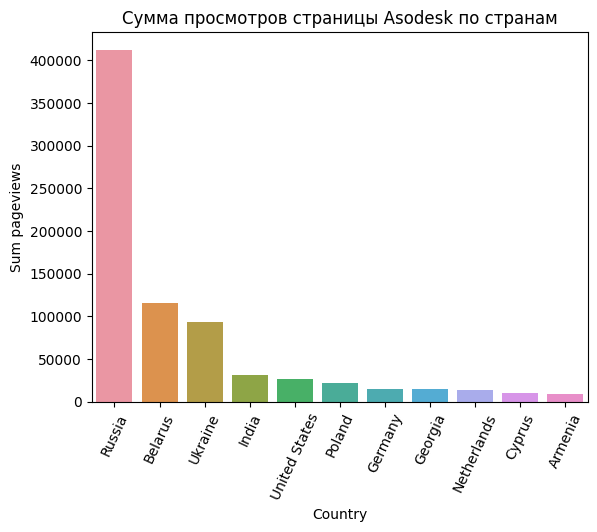

In [64]:
fig = plt.figure()

ax=sns.barplot(data=dcc.reset_index(), x="ga:country",y="sum_pageviews")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 65)
ax.set(title='Сумма просмотров страницы Asodesk по странам')
ax.set_xlabel("Country")
ax.set_ylabel('Sum pageviews')

plt.show()

In [13]:
Statistics_s=pd.DataFrame(site.groupby(['ga:country'])['ga:pageviews'].count()).sort_values(by='ga:pageviews', ascending=False).rename(columns={'ga:pageviews':'count_pageviews'})
mean=pd.DataFrame(site.groupby(['ga:country'])['ga:pageviews'].mean()).sort_values(by='ga:pageviews', ascending=False).rename(columns={'ga:pageviews':'mean_pageviews'})
var=pd.DataFrame(site.groupby(['ga:country'])['ga:pageviews'].var()).sort_values(by='ga:pageviews', ascending=False).rename(columns={'ga:pageviews':'var_pageviews'})

In [14]:
Statistics_s=pd.concat([Statistics_s,dcc,mean,var],axis=1)
Statistics_s

,count_pageviews,sum_pageviews,mean_pageviews,var_pageviews
ga:country,,,,
Russia,228589,412322,1.803770,448.974469
Belarus,73431,115043,1.566682,37.933559
Ukraine,53054,93664,1.765447,175.910264
Poland,13948,21284,1.525954,28.666495
India,9531,31088,3.261777,339.517719
United States,9388,26743,2.848637,290.550326
Georgia,8583,14598,1.700804,96.579313
Netherlands,7541,13023,1.726959,54.591354
Germany,6706,14758,2.200716,147.830252


In [15]:
np.std(Statistics_s)

count_pageviews     63959.456026
sum_pageviews      113728.598745
mean_pageviews          0.523931
var_pageviews         134.655701
dtype: float64

In [16]:
scipy.stats.pearsonr(Statistics_s['sum_pageviews'], Statistics_s['mean_pageviews'])

PearsonRResult(statistic=-0.19520208925009022, pvalue=0.5651624066499612)

In [17]:
scipy.stats.spearmanr(Statistics_s['sum_pageviews'], Statistics_s['mean_pageviews'])

SpearmanrResult(correlation=-0.09090909090909091, pvalue=0.7903727377532903)

In [18]:
scipy.stats.kendalltau(Statistics_s['sum_pageviews'], Statistics_s['mean_pageviews'])

KendalltauResult(correlation=-0.05454545454545454, pvalue=0.8792698312489979)

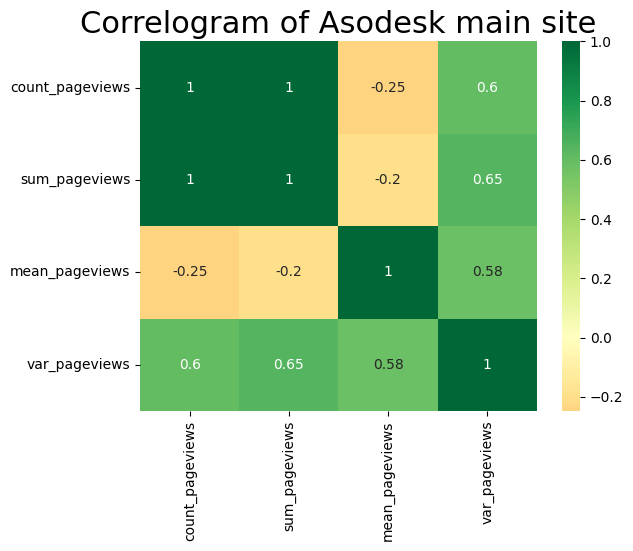

In [66]:
sns.heatmap(Statistics_s.corr(), xticklabels=Statistics_s.corr().columns, yticklabels=Statistics_s.corr().columns, cmap='RdYlGn', center=0, annot=True)

plt.title('Correlogram of Asodesk main site', fontsize=22);

In [20]:
site_landing=site
site_landing

,index,ga:country,ga:pagePath,ga:landingPagePath,ga:secondPagePath,ga:exitPagePath,ga:pageviews
0,241911,Russia,127.0.0.1/accounts/password/reset/,127.0.0.1/accounts/login/,127.0.0.1/accounts/login/,127.0.0.1/accounts/login/,1
1,241910,Russia,127.0.0.1/accounts/login/,127.0.0.1/accounts/login/,127.0.0.1/accounts/login/,127.0.0.1/accounts/login/,25
2,181421,Russia,84.53.242.184/accounts/login/,84.53.242.184/accounts/login/,84.53.242.184/accounts/login/,84.53.242.184/accounts/login/,4
3,181420,Russia,84.53.242.184/accounts/login/,84.53.242.184/accounts/login/,84.53.242.184/accounts/login/,84.53.242.184/accounts/login/,2
4,182674,Russia,hq.asodesk.com/ru/,alpha.asodesk.com/accounts/login/,alpha.asodesk.com/accounts/login/,hq.asodesk.com/settings/billing/,1
...,...,...,...,...,...,...,...
420240,416944,Russia,zeta.asodesk.com/accounts/signup/,zeta.asodesk.com/accounts/login/,zeta.asodesk.com/accounts/login/,zeta.asodesk.com/accounts/verify/,1
420241,416939,Russia,zeta.asodesk.com/accounts/login/,zeta.asodesk.com/accounts/login/,zeta.asodesk.com/accounts/login/,zeta.asodesk.com/accounts/verify/,2
420242,416947,Russia,zeta.asodesk.com/accounts/login/,zeta.asodesk.com/accounts/logout/,zeta.asodesk.com/accounts/logout/,zeta.asodesk.com/accounts/login/,1
420243,416948,Russia,zeta.asodesk.com/accounts/logout/,zeta.asodesk.com/accounts/logout/,zeta.asodesk.com/accounts/logout/,zeta.asodesk.com/accounts/login/,1


### Общий анализ 

In [21]:
landing_page=pd.DataFrame(site.groupby(['ga:landingPagePath','ga:exitPagePath'])['ga:pageviews'].count()).sort_values(by='ga:pageviews', ascending=False).rename(columns={'ga:pageviews':'landing_pageviews'}).reset_index().head(10)
landing_page

,ga:landingPagePath,ga:exitPagePath,landing_pageviews
0,hq.asodesk.com/us/app,hq.asodesk.com/us/app,37232
1,hq.asodesk.com/ru/app,hq.asodesk.com/ru/app,24689
2,asodesk.com/,hq.asodesk.com/us/app,13273
3,hq.asodesk.com/ru/,hq.asodesk.com/ru/app,7511
4,asodesk.com/,hq.asodesk.com/ru/app,6507
5,hq.asodesk.com/jp/app,hq.asodesk.com/jp/app,6488
6,asodesk.com/,hq.asodesk.com/jp/app,4271
7,hq.asodesk.com/ru/app,hq.asodesk.com/us/app,4142
8,hq.asodesk.com/us/app,hq.asodesk.com/ru/app,4117
9,hq.asodesk.com/cn/app,hq.asodesk.com/cn/app,3607


In [22]:
land=pd.DataFrame(site.groupby(['ga:landingPagePath'])['ga:pageviews'].sum()).sort_values(by='ga:pageviews', ascending=False).rename(columns={'ga:pageviews':'sum_pageviews'}).reset_index().head(10)
land

,ga:landingPagePath,sum_pageviews
0,asodesk.com/,132288
1,hq.asodesk.com/us/app,89879
2,hq.asodesk.com/ru/app,79821
3,hq.asodesk.com/ru/,48639
4,hq.asodesk.com/us/,31146
5,hq.asodesk.com/accounts/login/,24190
6,ru.asodesk.com/,18494
7,hq.asodesk.com/gb/app,15104
8,hq.asodesk.com/cn/app,12776
9,asodesk.com/free-tools,11963


In [23]:
exit_page=pd.DataFrame(site.groupby(['ga:exitPagePath'])['ga:pageviews'].count()).sort_values(by='ga:pageviews', ascending=False).rename(columns={'ga:pageviews':'exit_pageviews'}).reset_index().head(10)
exit_page

,ga:exitPagePath,exit_pageviews
0,hq.asodesk.com/us/app,89665
1,hq.asodesk.com/ru/app,57407
2,hq.asodesk.com/jp/app,18328
3,hq.asodesk.com/ru/,15680
4,hq.asodesk.com/us/,12795
5,hq.asodesk.com/gb/app,12270
6,hq.asodesk.com/fr/app,11219
7,hq.asodesk.com/de/app,10860
8,hq.asodesk.com/ca/app,9221
9,hq.asodesk.com/cn/app,9068


In [24]:
l=pd.concat([pd.DataFrame(site.groupby(['ga:landingPagePath'])['ga:pageviews'].sum()),(pd.DataFrame(site.groupby(['ga:exitPagePath'])['ga:pageviews'].sum()).rename(columns={'ga:pageviews':'exit_pageviews'}))],axis=1)
l=l.sort_values('ga:pageviews',ascending=False).reset_index().rename(columns={'ga:pageviews':'land_pageviews','index':'landing_page'})
l=l.head(10)
l

,landing_page,land_pageviews,exit_pageviews
0,asodesk.com/,132288.0,10513.0
1,hq.asodesk.com/us/app,89879.0,124907.0
2,hq.asodesk.com/ru/app,79821.0,97170.0
3,hq.asodesk.com/ru/,48639.0,45541.0
4,hq.asodesk.com/us/,31146.0,63408.0
5,hq.asodesk.com/accounts/login/,24190.0,10753.0
6,ru.asodesk.com/,18494.0,3065.0
7,hq.asodesk.com/gb/app,15104.0,16235.0
8,hq.asodesk.com/cn/app,12776.0,11787.0
9,asodesk.com/free-tools,11963.0,2703.0


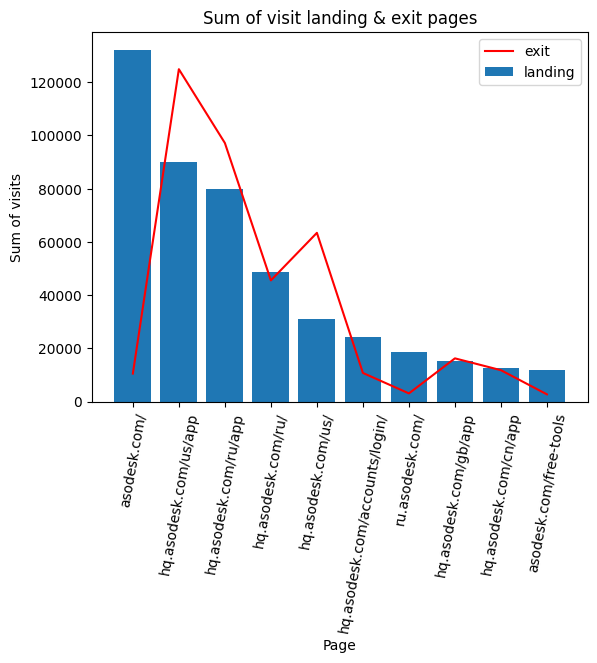

In [67]:
fig, ax =plt.subplots()
plt.xticks(rotation = 80)

plt.plot('landing_page','exit_pageviews', data=l ,color='r', label='exit')
plt.bar(data=l, x='landing_page',height='land_pageviews',label='landing')


plt.xlabel("Page")
plt.ylabel("Sum of visits")
plt.title("Sum of visit landing & exit pages")
plt.legend();

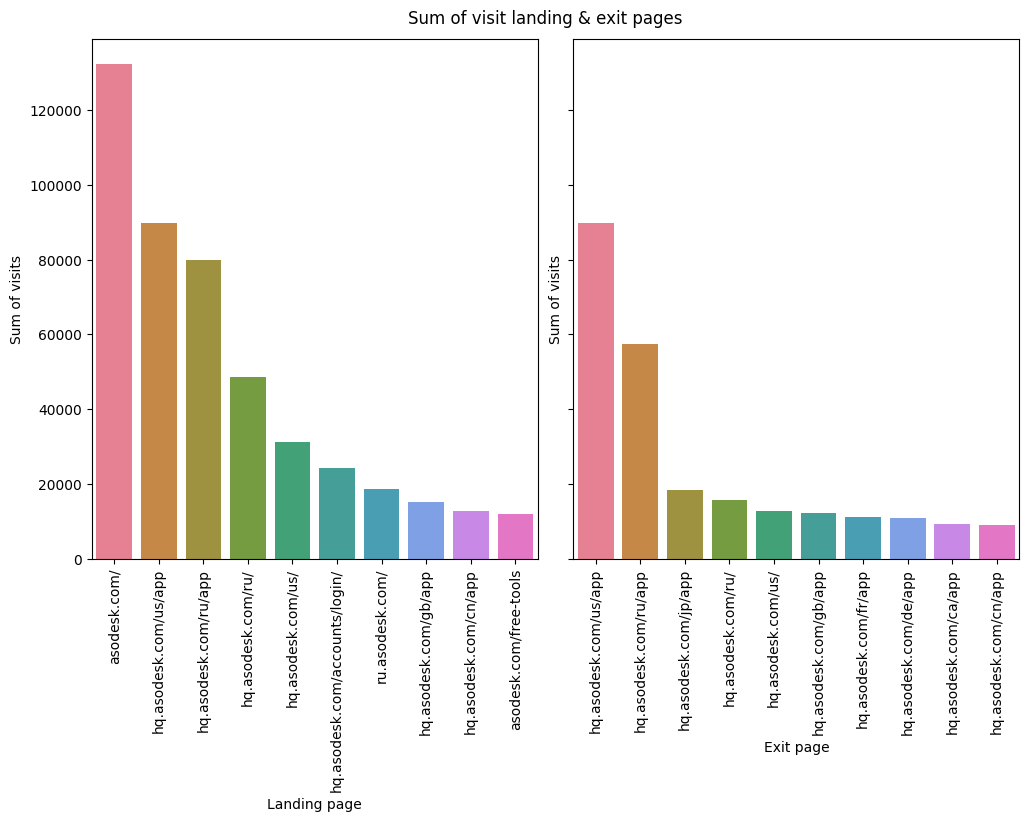

In [90]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True,figsize=(10, 6) )
fig.tight_layout(w_pad=1)


sns.barplot(x = 'ga:landingPagePath', y = 'sum_pageviews',
           data = land, ax=ax1, palette="husl")
sns.barplot(x = 'ga:exitPagePath', y = 'exit_pageviews',
           data = exit_page, ax=ax2, palette="husl", saturation=0.75)

ax1.set_xticklabels(ax1.get_xticklabels(),rotation = 90)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation = 90)

ax1.set_xlabel("Landing page")
ax1.set_ylabel("Sum of visits")

ax2.set_xlabel("Exit page")
ax2.set_ylabel("Sum of visits")

fig.suptitle("Sum of visit landing & exit pages")
fig.subplots_adjust(top=0.93)

plt.show()


In [27]:
landing_exit_page=pd.concat([landing_page,exit_page],axis=1).reset_index().rename(columns={'index':'page'}).head(10)

In [28]:
landing_exit_page

,page,ga:landingPagePath,ga:exitPagePath,landing_pageviews,ga:exitPagePath,exit_pageviews
0,0,hq.asodesk.com/us/app,hq.asodesk.com/us/app,37232,hq.asodesk.com/us/app,89665
1,1,hq.asodesk.com/ru/app,hq.asodesk.com/ru/app,24689,hq.asodesk.com/ru/app,57407
2,2,asodesk.com/,hq.asodesk.com/us/app,13273,hq.asodesk.com/jp/app,18328
3,3,hq.asodesk.com/ru/,hq.asodesk.com/ru/app,7511,hq.asodesk.com/ru/,15680
4,4,asodesk.com/,hq.asodesk.com/ru/app,6507,hq.asodesk.com/us/,12795
5,5,hq.asodesk.com/jp/app,hq.asodesk.com/jp/app,6488,hq.asodesk.com/gb/app,12270
6,6,asodesk.com/,hq.asodesk.com/jp/app,4271,hq.asodesk.com/fr/app,11219
7,7,hq.asodesk.com/ru/app,hq.asodesk.com/us/app,4142,hq.asodesk.com/de/app,10860
8,8,hq.asodesk.com/us/app,hq.asodesk.com/ru/app,4117,hq.asodesk.com/ca/app,9221
9,9,hq.asodesk.com/cn/app,hq.asodesk.com/cn/app,3607,hq.asodesk.com/cn/app,9068


In [29]:
ex=pd.DataFrame(site.groupby(['ga:exitPagePath'])['ga:pageviews'].sum()).sort_values(by='ga:pageviews', ascending=False).rename(columns={'ga:pageviews':'sum_pageviews'}).reset_index().head(10)
ex

,ga:exitPagePath,sum_pageviews
0,hq.asodesk.com/us/app,124907
1,hq.asodesk.com/ru/app,97170
2,hq.asodesk.com/us/,63408
3,hq.asodesk.com/ru/,45541
4,hq.asodesk.com/jp/app,22035
5,hq.asodesk.com/gb/app,16235
6,hq.asodesk.com/de/app,14239
7,hq.asodesk.com/fr/app,14092
8,hq.asodesk.com/ca/app,12019
9,hq.asodesk.com/cn/app,11787


In [30]:
df=site.loc[site['ga:landingPagePath'].isin(land['ga:landingPagePath'])]
df

,index,ga:country,ga:pagePath,ga:landingPagePath,ga:secondPagePath,ga:exitPagePath,ga:pageviews
282,154826,Georgia,hq.asodesk.com/us/app,asodesk.com/,hq.asodesk.com/ua/,hq.asodesk.com/us/app,2
283,155207,Georgia,asodesk.com/,asodesk.com/,hq.asodesk.com/accounts/login/,hq.asodesk.com/us/,22
284,155208,Georgia,asodesk.com/,asodesk.com/,hq.asodesk.com/accounts/login/,hq.asodesk.com/us/app,1
285,155209,Georgia,asodesk.com/,asodesk.com/,hq.asodesk.com/accounts/login/,hq.asodesk.com/us/app,1
286,155210,Georgia,asodesk.com/,asodesk.com/,hq.asodesk.com/accounts/login/,hq.asodesk.com/us/app,1
...,...,...,...,...,...,...,...
398810,404749,Russia,ru.asodesk.com/,ru.asodesk.com/,ru.asodesk.com/pricing,ru.asodesk.com/pricing,82
398811,404748,Russia,ru.asodesk.com/,ru.asodesk.com/,ru.asodesk.com/pricing,ru.asodesk.com/free-tools,1
398812,404747,Russia,ru.asodesk.com/,ru.asodesk.com/,ru.asodesk.com/pricing,ru.asodesk.com/email_course,2
398813,404757,Russia,ru.asodesk.com/,ru.asodesk.com/,ru.asodesk.com/replies-to-reviews,hq.asodesk.com/ru/,1


### Анализ по странам

##### Russia

In [31]:
Russia=df[df['ga:country'].str.contains('Russia')]
Russia

,index,ga:country,ga:pagePath,ga:landingPagePath,ga:secondPagePath,ga:exitPagePath,ga:pageviews
4429,231275,Russia,hq.asodesk.com/ua/app,asodesk.com/,hq.asodesk.com/us/,hq.asodesk.com/ua/app,1
4431,229356,Russia,hq.asodesk.com/us/app,asodesk.com/,hq.asodesk.com/accounts/login/,hq.asodesk.com/us/app,1
4432,229357,Russia,hq.asodesk.com/us/app,asodesk.com/,hq.asodesk.com/ru/,hq.asodesk.com/us/app,1
4433,229358,Russia,hq.asodesk.com/us/app,asodesk.com/,hq.asodesk.com/ru/,hq.asodesk.com/us/app,1
4434,229359,Russia,hq.asodesk.com/us/app,asodesk.com/,hq.asodesk.com/ru/,hq.asodesk.com/cn/app,1
...,...,...,...,...,...,...,...
398810,404749,Russia,ru.asodesk.com/,ru.asodesk.com/,ru.asodesk.com/pricing,ru.asodesk.com/pricing,82
398811,404748,Russia,ru.asodesk.com/,ru.asodesk.com/,ru.asodesk.com/pricing,ru.asodesk.com/free-tools,1
398812,404747,Russia,ru.asodesk.com/,ru.asodesk.com/,ru.asodesk.com/pricing,ru.asodesk.com/email_course,2
398813,404757,Russia,ru.asodesk.com/,ru.asodesk.com/,ru.asodesk.com/replies-to-reviews,hq.asodesk.com/ru/,1


In [32]:
r_land=pd.DataFrame(Russia.groupby(['ga:landingPagePath'])['ga:pageviews'].sum()).sort_values(by='ga:pageviews', ascending=False).rename(columns={'ga:pageviews':'sum_pageviews'}).reset_index().head(10)
r_land

,ga:landingPagePath,sum_pageviews
0,hq.asodesk.com/ru/app,71102
1,asodesk.com/,65534
2,hq.asodesk.com/us/app,43351
3,hq.asodesk.com/ru/,36204
4,hq.asodesk.com/us/,20457
5,ru.asodesk.com/,13374
6,hq.asodesk.com/accounts/login/,12434
7,hq.asodesk.com/cn/app,8864
8,hq.asodesk.com/gb/app,7829
9,asodesk.com/free-tools,479


In [33]:
r_exit_page=pd.DataFrame(Russia.groupby(['ga:exitPagePath'])['ga:pageviews'].count()).sort_values(by='ga:pageviews', ascending=False).rename(columns={'ga:pageviews':'exit_pageviews'}).reset_index().head(10)
r_exit_page

,ga:exitPagePath,exit_pageviews
0,hq.asodesk.com/ru/app,38317
1,hq.asodesk.com/us/app,34637
2,hq.asodesk.com/ru/,8348
3,hq.asodesk.com/jp/app,6798
4,hq.asodesk.com/cn/app,6077
5,hq.asodesk.com/gb/app,5082
6,hq.asodesk.com/us/,3477
7,hq.asodesk.com/fr/app,3345
8,hq.asodesk.com/ca/app,2829
9,hq.asodesk.com/de/app,2503


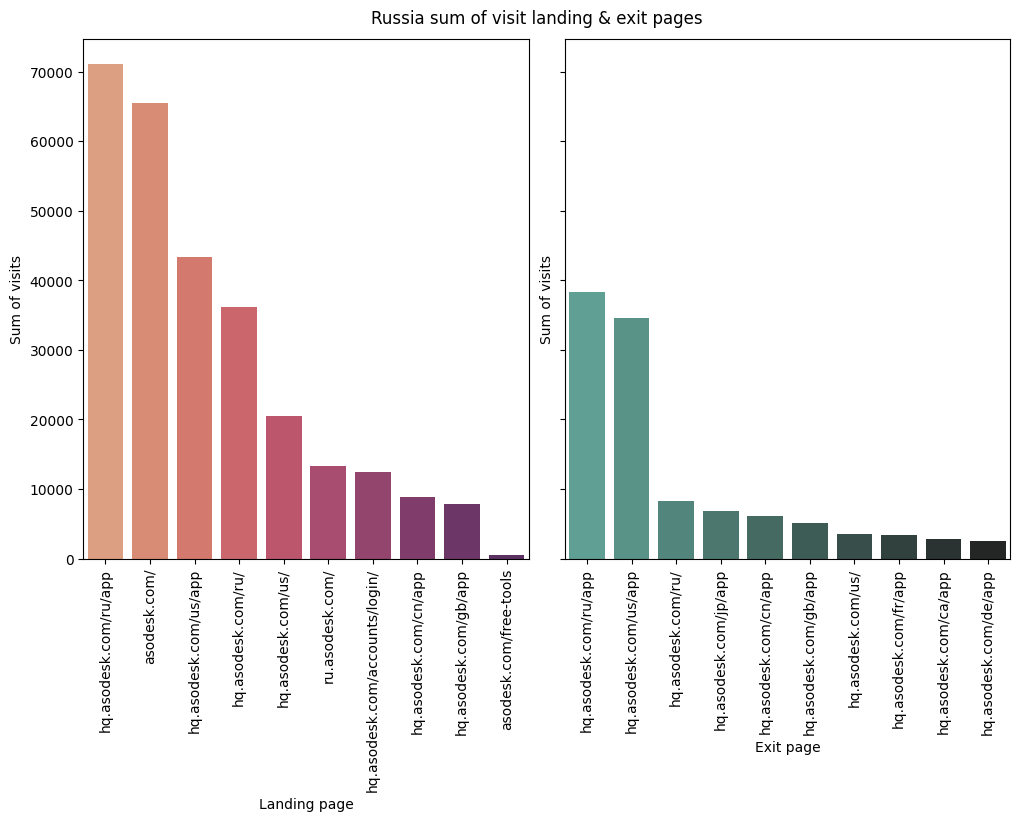

In [92]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(10, 6) )
fig.tight_layout(w_pad=1)


sns.barplot(x = 'ga:landingPagePath', y = 'sum_pageviews',
           data = r_land, ax=ax1, palette='flare')
sns.barplot(x = 'ga:exitPagePath', y = 'exit_pageviews',
           data = r_exit_page, ax=ax2, palette="dark:#5A9_r")

ax1.set_xticklabels(ax1.get_xticklabels(),rotation = 90)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation = 90)

ax1.set_xlabel("Landing page")
ax1.set_ylabel("Sum of visits")

ax2.set_xlabel("Exit page")
ax2.set_ylabel("Sum of visits")

fig.suptitle("Russia sum of visit landing & exit pages")
fig.subplots_adjust(top=0.93)

plt.show()

In [35]:
r1=pd.concat([pd.DataFrame(Russia.groupby(['ga:landingPagePath'])['ga:pageviews'].sum()),(pd.DataFrame(Russia.groupby(['ga:exitPagePath'])['ga:pageviews'].sum()).rename(columns={'ga:pageviews':'exit_pageviews'}))],axis=1)
r2_1=pd.DataFrame(Russia.groupby(['ga:landingPagePath'])['ga:pageviews'].mean()).rename(columns={'ga:pageviews':'mean_land_pageviews'})
r2=pd.concat([r2_1,(pd.DataFrame(Russia.groupby(['ga:exitPagePath'])['ga:pageviews'].mean()).rename(columns={'ga:pageviews':'mean_exit_pageviews'}))],axis=1)
r=pd.concat([r1,r2],axis=1)
r=r.sort_values('ga:pageviews',ascending=False).reset_index().rename(columns={'ga:pageviews':'land_pageviews','index':'landing_page'})
r=r.head(10)
r

,landing_page,land_pageviews,exit_pageviews,mean_land_pageviews,mean_exit_pageviews
0,hq.asodesk.com/ru/app,71102.0,71603,1.982158,1.868701
1,asodesk.com/,65534.0,4795,2.216158,8.830571
2,hq.asodesk.com/us/app,43351.0,49249,1.437510,1.421861
3,hq.asodesk.com/ru/,36204.0,28218,1.728610,3.380211
4,hq.asodesk.com/us/,20457.0,27506,3.372404,7.910843
5,ru.asodesk.com/,13374.0,1755,2.301497,6.698473
6,hq.asodesk.com/accounts/login/,12434.0,4450,2.749668,7.200647
7,hq.asodesk.com/cn/app,8864.0,8086,1.206807,1.330591
8,hq.asodesk.com/gb/app,7829.0,6823,1.326050,1.342582
9,asodesk.com/free-tools,479.0,140,2.187215,2.456140


C:\Users\inna_\AppData\Local\Temp\ipykernel_8856\2051245907.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(r.corr(), xticklabels=r.corr().columns, yticklabels=r.corr().columns, cmap='RdYlGn', center=0, annot=True)


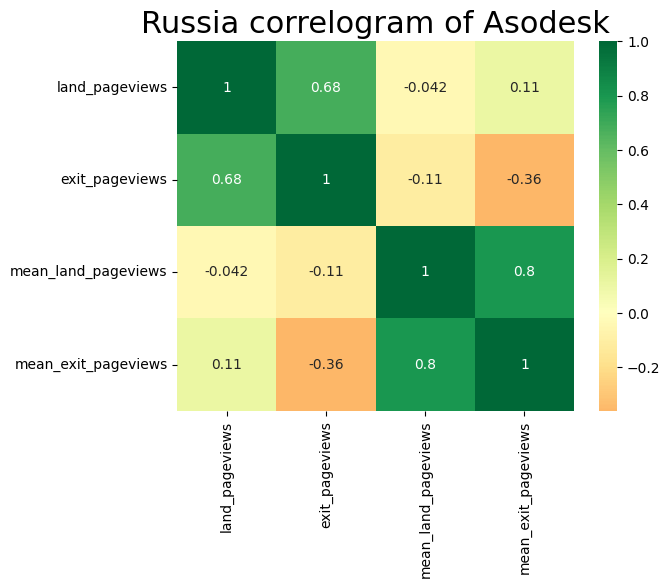

In [104]:
sns.heatmap(r.corr(), xticklabels=r.corr().columns, yticklabels=r.corr().columns, cmap='RdYlGn', center=0, annot=True)

plt.title('Russia correlogram of Asodesk', fontsize=22);

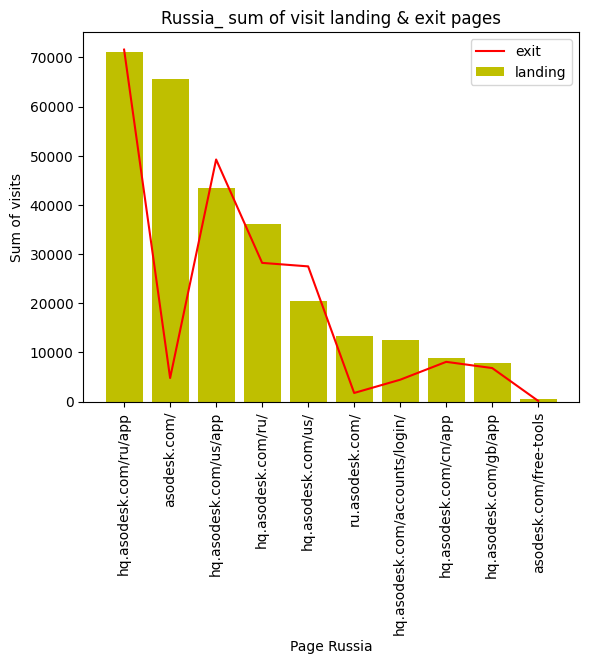

In [37]:
fig, ax =plt.subplots()
plt.xticks(rotation = 90)

plt.plot('landing_page','exit_pageviews', data=r ,color='r', label='exit')
plt.bar(data=r, x='landing_page',height='land_pageviews',label='landing', color='y')


plt.xlabel("Page Russia")
plt.ylabel("Sum of visits")
plt.title("Russia_ sum of visit landing & exit pages")
plt.legend();

#### Belarus + Ukraine

In [38]:
BU=df[df['ga:country'].str.contains('Belarus|Ukraine')]
BU

,index,ga:country,ga:pagePath,ga:landingPagePath,ga:secondPagePath,ga:exitPagePath,ga:pageviews
9852,433852,Ukraine,ru.asodesk.com/blog/6-РїРѕР»РµР·РЅС‹С…-aso-РїС...,asodesk.com/,hq.asodesk.com/ua/,ru.asodesk.com/blog/page/4/,1
9853,433853,Ukraine,ru.asodesk.com/blog/9-mobile-app-marketing-tre...,asodesk.com/,asodesk.com/blog/,ru.asodesk.com/blog/9-mobile-app-marketing-tre...,1
9854,433854,Ukraine,ru.asodesk.com/blog/9-mobile-app-marketing-tre...,asodesk.com/,ru.asodesk.com/,ru.asodesk.com/blog/9-mobile-app-marketing-tre...,1
9855,433855,Ukraine,ru.asodesk.com/blog/,asodesk.com/,hq.asodesk.com/accounts/signup/,ru.asodesk.com/blog/category/РіР°Р№РґС‹/,1
9856,433856,Ukraine,ru.asodesk.com/blog/,asodesk.com/,hq.asodesk.com/ua/,ru.asodesk.com/blog/page/4/,1
...,...,...,...,...,...,...,...
397781,176942,Belarus,ru.asodesk.com/,ru.asodesk.com/,ru.asodesk.com/pricing,ru.asodesk.com/blog/how-to-save-time-on-buildi...,1
397782,176941,Belarus,ru.asodesk.com/,ru.asodesk.com/,ru.asodesk.com/pricing,ru.asodesk.com/,1
397783,176940,Belarus,ru.asodesk.com/,ru.asodesk.com/,ru.asodesk.com/keyword-boost,ru.asodesk.com/keyword-boost,1
397784,176939,Belarus,ru.asodesk.com/,ru.asodesk.com/,ru.asodesk.com/email-course,academy.asodesk.com/,1


In [39]:
BU_land=pd.DataFrame(BU.groupby(['ga:landingPagePath'])['ga:pageviews'].sum()).sort_values(by='ga:pageviews', ascending=False).rename(columns={'ga:pageviews':'sum_pageviews'}).reset_index().head(10)
BU_land

,ga:landingPagePath,sum_pageviews
0,hq.asodesk.com/us/app,34841
1,asodesk.com/,34402
2,hq.asodesk.com/ru/,8538
3,hq.asodesk.com/accounts/login/,7639
4,hq.asodesk.com/gb/app,5584
5,hq.asodesk.com/us/,4980
6,hq.asodesk.com/ru/app,4745
7,ru.asodesk.com/,4154
8,hq.asodesk.com/cn/app,2769
9,asodesk.com/free-tools,423


In [40]:
BU_exit_page=pd.DataFrame(BU.groupby(['ga:exitPagePath'])['ga:pageviews'].count()).sort_values(by='ga:pageviews', ascending=False).rename(columns={'ga:pageviews':'exit_pageviews'}).reset_index().head(10)
BU_exit_page

,ga:exitPagePath,exit_pageviews
0,hq.asodesk.com/us/app,24823
1,hq.asodesk.com/ru/app,6077
2,hq.asodesk.com/us/,2815
3,hq.asodesk.com/gb/app,2683
4,hq.asodesk.com/de/app,1398
5,hq.asodesk.com/cn/app,1365
6,hq.asodesk.com/ca/app,1290
7,hq.asodesk.com/ua/,1196
8,hq.asodesk.com/fr/app,1183
9,hq.asodesk.com/jp/app,1136


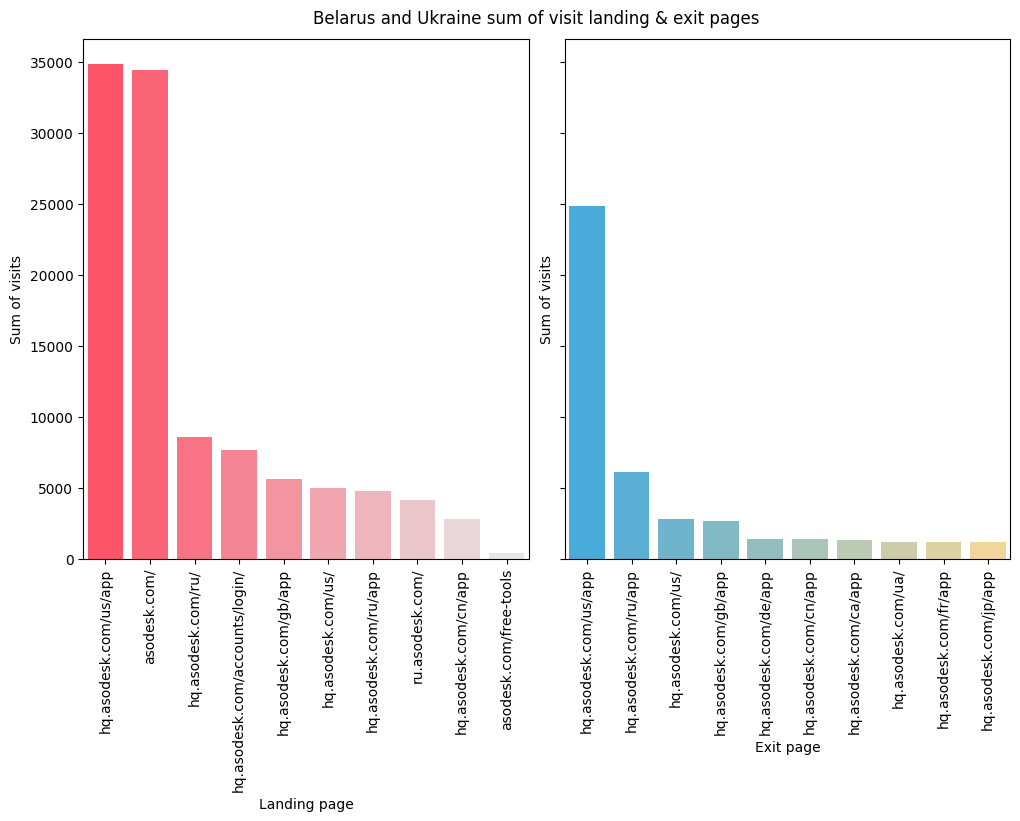

In [103]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(10, 6) )
fig.tight_layout(w_pad=1)


sns.barplot(x = 'ga:landingPagePath', y = 'sum_pageviews',
           data = BU_land, ax=ax1, palette='blend:#FD5469,#E6E6E6', saturation=12)
sns.barplot(x = 'ga:exitPagePath', y = 'exit_pageviews',
           data = BU_exit_page, ax=ax2, palette="blend:#31B3F3,#FFDB8B")

ax1.set_xticklabels(ax1.get_xticklabels(),rotation = 90)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation = 90)

ax1.set_xlabel("Landing page")
ax1.set_ylabel("Sum of visits")

ax2.set_xlabel("Exit page")
ax2.set_ylabel("Sum of visits")

fig.suptitle("Belarus and Ukraine sum of visit landing & exit pages")
fig.subplots_adjust(top=0.93)

plt.show()

In [119]:
bu1=pd.concat([pd.DataFrame(BU.groupby(['ga:landingPagePath'])['ga:pageviews'].sum()),(pd.DataFrame(BU.groupby(['ga:exitPagePath'])['ga:pageviews'].sum()).rename(columns={'ga:pageviews':'exit_pageviews'}))],axis=1)
bu2_1=pd.DataFrame(BU.groupby(['ga:landingPagePath'])['ga:pageviews'].mean()).rename(columns={'ga:pageviews':'mean_land_pageviews'})
bu2=pd.concat([bu2_1,(pd.DataFrame(BU.groupby(['ga:exitPagePath'])['ga:pageviews'].mean()).rename(columns={'ga:pageviews':'mean_exit_pageviews'}))],axis=1)
bu=pd.concat([bu1,bu2],axis=1)
bu=bu.sort_values('ga:pageviews',ascending=False).reset_index().rename(columns={'ga:pageviews':'land_pageviews','index':'landing_page'})
bu=bu.head(10)
bu

,landing_page,land_pageviews,exit_pageviews,mean_land_pageviews,mean_exit_pageviews
0,hq.asodesk.com/us/app,34841.0,35156,1.423709,1.416267
1,asodesk.com/,34402.0,1990,2.114314,5.558659
2,hq.asodesk.com/ru/,8538.0,3411,1.617658,3.015915
3,hq.asodesk.com/accounts/login/,7639.0,1415,2.045795,4.685430
4,hq.asodesk.com/gb/app,5584.0,3539,1.265639,1.319046
5,hq.asodesk.com/us/,4980.0,11383,2.491246,4.043694
6,hq.asodesk.com/ru/app,4745.0,8077,1.346099,1.329110
7,ru.asodesk.com/,4154.0,678,1.851984,2.187097
8,hq.asodesk.com/cn/app,2769.0,1755,1.186884,1.285714
9,asodesk.com/free-tools,423.0,56,1.762500,2.240000


C:\Users\inna_\AppData\Local\Temp\ipykernel_8856\3473114847.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(bu.corr(), xticklabels=bu.corr().columns, yticklabels=bu.corr().columns, cmap='RdYlGn', center=0, annot=True)


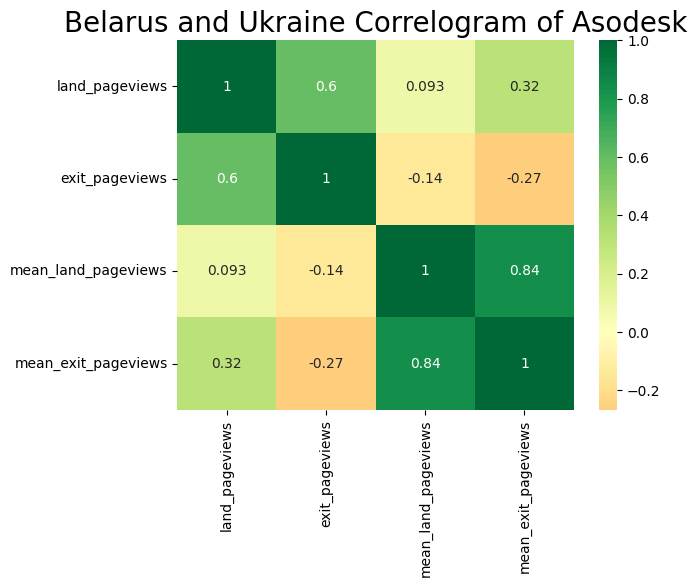

In [120]:
sns.heatmap(bu.corr(), xticklabels=bu.corr().columns, yticklabels=bu.corr().columns, cmap='RdYlGn', center=0, annot=True)

plt.title('Belarus and Ukraine Correlogram of Asodesk', fontsize=20);

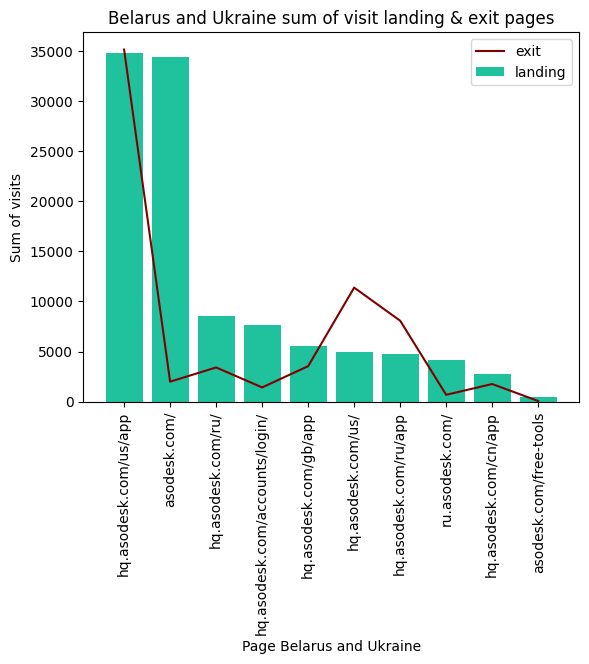

In [122]:
fig, ax =plt.subplots()
plt.xticks(rotation = 90)

plt.plot('landing_page','exit_pageviews', data=bu , label='exit', color ="maroon")
plt.bar(data=bu, x='landing_page',height='land_pageviews',label='landing', color='#1FC29D')


plt.xlabel("Page Belarus and Ukraine")
plt.ylabel("Sum of visits")
plt.title("Belarus and Ukraine sum of visit landing & exit pages")
plt.legend();

### US

In [45]:
US=df[df['ga:country'].str.contains('United States')]
US

,index,ga:country,ga:pagePath,ga:landingPagePath,ga:secondPagePath,ga:exitPagePath,ga:pageviews
435,488861,United States,hq.asodesk.com/us/,asodesk.com/,hq.asodesk.com/us/,hq.asodesk.com/us/app,1
13439,488618,United States,hq.asodesk.com/settings/api-pricing/,asodesk.com/,hq.asodesk.com/us/,hq.asodesk.com/accounts/logout/,1
13440,488619,United States,hq.asodesk.com/settings/api-pricing/,asodesk.com/,hq.asodesk.com/us/,hq.asodesk.com/accounts/logout/,1
13441,488620,United States,hq.asodesk.com/settings/billing/,asodesk.com/,hq.asodesk.com/accounts/login/,hq.asodesk.com/us/,1
13442,488621,United States,hq.asodesk.com/settings/billing/,asodesk.com/,hq.asodesk.com/ru/,hq.asodesk.com/settings/profile,1
...,...,...,...,...,...,...,...
385208,500932,United States,hq.asodesk.com/us/app,hq.asodesk.com/us/app,hq.asodesk.com/us/app,hq.asodesk.com/us/app,3
385209,500933,United States,hq.asodesk.com/us/app,hq.asodesk.com/us/app,hq.asodesk.com/us/app,hq.asodesk.com/us/app,3
385210,500926,United States,hq.asodesk.com/us/app,hq.asodesk.com/us/app,hq.asodesk.com/us/app,hq.asodesk.com/au/app,2
385558,500936,United States,hq.asodesk.com/us/app,hq.asodesk.com/us/app,hq.asodesk.com/us/app,hq.asodesk.com/us/app,1


In [46]:
US_land=pd.DataFrame(US.groupby(['ga:landingPagePath'])['ga:pageviews'].sum()).sort_values(by='ga:pageviews', ascending=False).rename(columns={'ga:pageviews':'sum_pageviews'}).reset_index().head(10)
US_land

,ga:landingPagePath,sum_pageviews
0,asodesk.com/,5466
1,hq.asodesk.com/us/app,2190
2,hq.asodesk.com/accounts/login/,1468
3,hq.asodesk.com/us/,1300
4,hq.asodesk.com/ru/,769
5,hq.asodesk.com/ru/app,482
6,asodesk.com/free-tools,338
7,hq.asodesk.com/gb/app,228


In [47]:
US_exit_page=pd.DataFrame(US.groupby(['ga:exitPagePath'])['ga:pageviews'].count()).sort_values(by='ga:pageviews', ascending=False).rename(columns={'ga:pageviews':'exit_pageviews'}).reset_index().head(10)
US_exit_page

,ga:exitPagePath,exit_pageviews
0,hq.asodesk.com/us/app,1791
1,hq.asodesk.com/ru/app,381
2,hq.asodesk.com/us/,380
3,hq.asodesk.com/ru/,175
4,hq.asodesk.com/accounts/signup/,119
5,hq.asodesk.com/sk/app,114
6,asodesk.com/,106
7,hq.asodesk.com/settings/pricing,103
8,hq.asodesk.com/gb/app,85
9,hq.asodesk.com/us/trending-searches,71


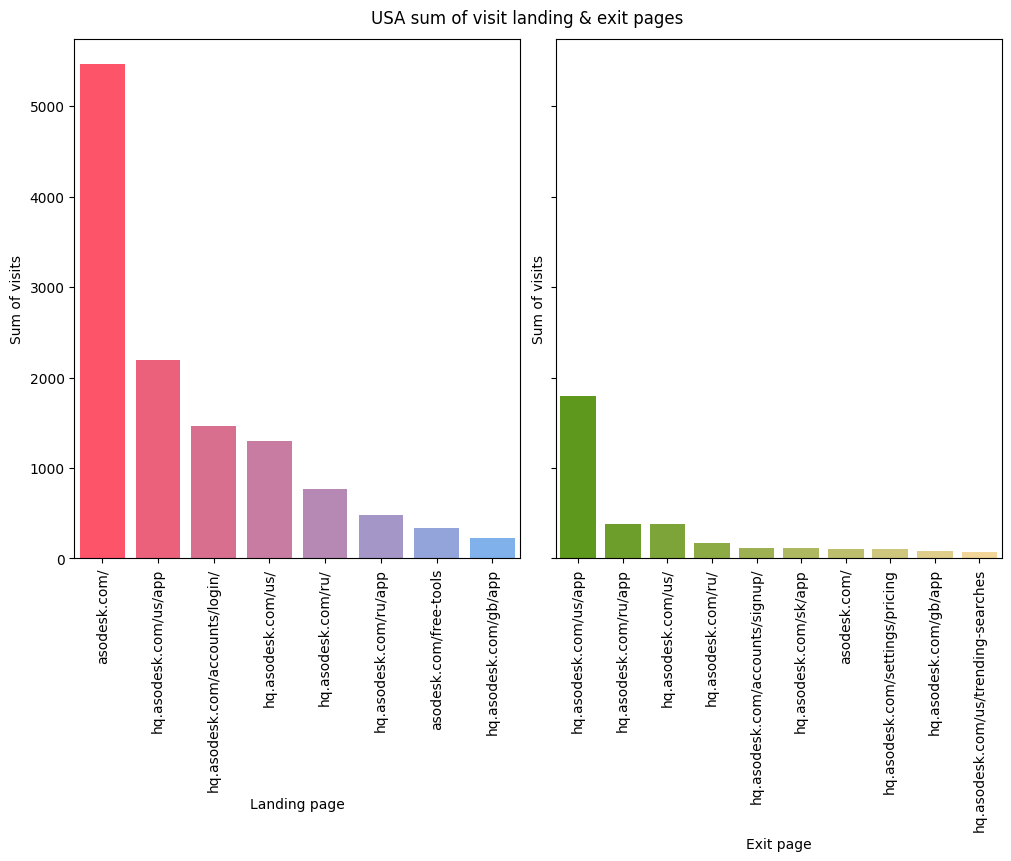

In [114]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(10, 6) )
fig.tight_layout(w_pad=1)


sns.barplot(x = 'ga:landingPagePath', y = 'sum_pageviews',
           data = US_land, ax=ax1, palette='blend:#FD5469,#80B1EB', saturation=12)
sns.barplot(x = 'ga:exitPagePath', y = 'exit_pageviews',
           data = US_exit_page, ax=ax2, palette="blend:#5FAC09,#FFDB8B")

ax1.set_xticklabels(ax1.get_xticklabels(),rotation = 90)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation = 90)

ax1.set_xlabel("Landing page")
ax1.set_ylabel("Sum of visits")

ax2.set_xlabel("Exit page")
ax2.set_ylabel("Sum of visits")

fig.suptitle("USA sum of visit landing & exit pages")
fig.subplots_adjust(top=0.93)

plt.show()

In [125]:
us1=pd.concat([pd.DataFrame(US.groupby(['ga:landingPagePath'])['ga:pageviews'].sum()),(pd.DataFrame(US.groupby(['ga:exitPagePath'])['ga:pageviews'].sum()).rename(columns={'ga:pageviews':'exit_pageviews'}))],axis=1)
us2_1=pd.DataFrame(US.groupby(['ga:landingPagePath'])['ga:pageviews'].mean()).rename(columns={'ga:pageviews':'mean_land_pageviews'})
us2=pd.concat([us2_1,(pd.DataFrame(US.groupby(['ga:exitPagePath'])['ga:pageviews'].mean()).rename(columns={'ga:pageviews':'mean_exit_pageviews'}))],axis=1)
us=pd.concat([us1,us2],axis=1)
us=us.sort_values('ga:pageviews',ascending=False).reset_index().rename(columns={'ga:pageviews':'land_pageviews','index':'landing_page'})
us=us.head(10)
us

,landing_page,land_pageviews,exit_pageviews,mean_land_pageviews,mean_exit_pageviews
0,asodesk.com/,5466.0,1016,2.780264,9.584906
1,hq.asodesk.com/us/app,2190.0,2712,1.571019,1.514238
2,hq.asodesk.com/accounts/login/,1468.0,1169,6.553571,17.712121
3,hq.asodesk.com/us/,1300.0,2744,2.819957,7.221053
4,hq.asodesk.com/ru/,769.0,901,2.717314,5.148571
5,hq.asodesk.com/ru/app,482.0,576,1.650685,1.511811
6,asodesk.com/free-tools,338.0,109,2.099379,3.303030
7,hq.asodesk.com/gb/app,228.0,131,1.341176,1.541176
8,academy.asodesk.com/aso-course,NaN,4,NaN,1.000000
9,academy.asodesk.com/en,NaN,6,NaN,1.000000


C:\Users\inna_\AppData\Local\Temp\ipykernel_8856\1396844797.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(bu.corr(), xticklabels=bu.corr().columns, yticklabels=bu.corr().columns, cmap='RdYlGn', center=0, annot=True)


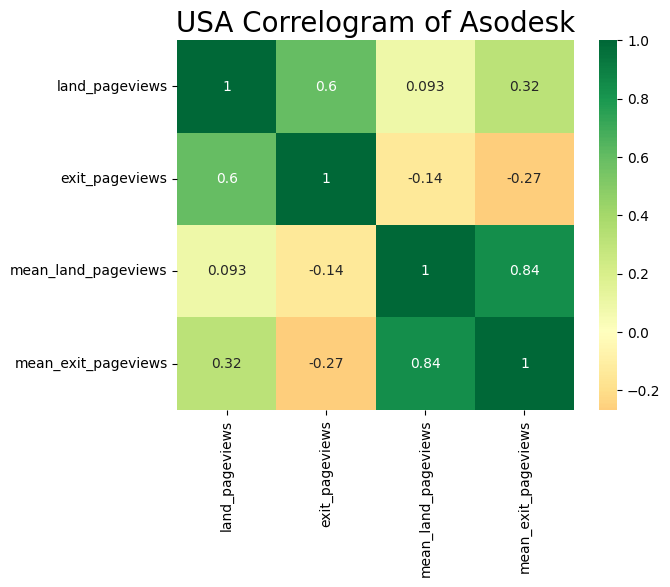

In [126]:
sns.heatmap(bu.corr(), xticklabels=bu.corr().columns, yticklabels=bu.corr().columns, cmap='RdYlGn', center=0, annot=True)

plt.title('USA Correlogram of Asodesk', fontsize=20);

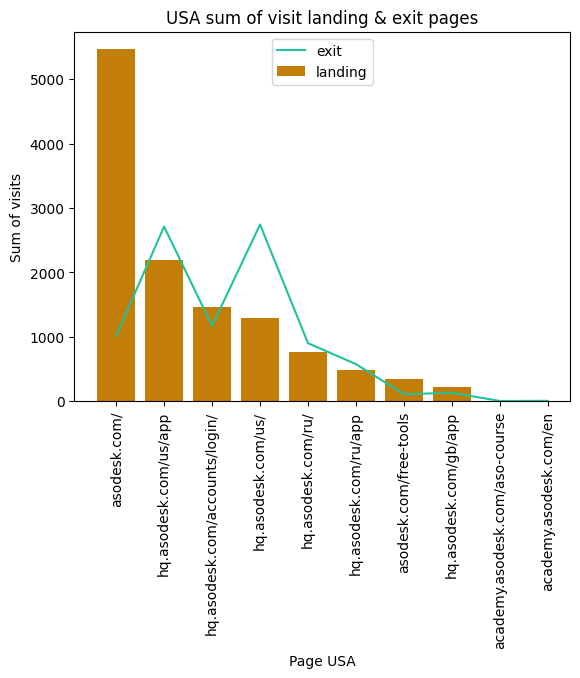

In [128]:
fig, ax =plt.subplots()
plt.xticks(rotation = 90)

plt.plot('landing_page','exit_pageviews', data=us ,color='#1FC29D', label='exit')
plt.bar(data=us, x='landing_page',height='land_pageviews',label='landing', color='#C37D09')


plt.xlabel("Page USA")
plt.ylabel("Sum of visits")
plt.title("USA sum of visit landing & exit pages")
plt.legend();

In [116]:
land_US=pd.DataFrame(US.groupby(['ga:landingPagePath'])['ga:pageviews'].sum()).sort_values(by='ga:pageviews', ascending=False).rename(columns={'ga:pageviews':'sum_pageviews'}).reset_index().head(10)
land_US

,ga:landingPagePath,sum_pageviews
0,asodesk.com/,5466
1,hq.asodesk.com/us/app,2190
2,hq.asodesk.com/accounts/login/,1468
3,hq.asodesk.com/us/,1300
4,hq.asodesk.com/ru/,769
5,hq.asodesk.com/ru/app,482
6,asodesk.com/free-tools,338
7,hq.asodesk.com/gb/app,228


In [118]:
exit_US=pd.DataFrame(US.groupby(['ga:exitPagePath'])['ga:pageviews'].sum()).sort_values(by='ga:pageviews', ascending=False).rename(columns={'ga:pageviews':'sum_pageviews'}).reset_index().head(10)
exit_US

,ga:exitPagePath,sum_pageviews
0,hq.asodesk.com/us/,2744
1,hq.asodesk.com/us/app,2712
2,hq.asodesk.com/accounts/login/,1169
3,asodesk.com/,1016
4,hq.asodesk.com/ru/,901
5,hq.asodesk.com/ru/app,576
6,hq.asodesk.com/accounts/signup/,285
7,hq.asodesk.com/settings/pricing,208
8,hq.asodesk.com/gb/app,131
9,asodesk.com/pricing,125


In [117]:
l_usa=pd.concat([pd.DataFrame(US.groupby(['ga:landingPagePath'])['ga:pageviews'].sum()),(pd.DataFrame(US.groupby(['ga:exitPagePath'])['ga:pageviews'].sum()).rename(columns={'ga:pageviews':'exit_pageviews'}))],axis=1)
l_usa=l_usa.sort_values('ga:pageviews',ascending=False).reset_index().rename(columns={'ga:pageviews':'land_pageviews','index':'landing_page'})
l_usa=l_usa.head(10)
l_usa

,landing_page,land_pageviews,exit_pageviews
0,asodesk.com/,5466.0,1016
1,hq.asodesk.com/us/app,2190.0,2712
2,hq.asodesk.com/accounts/login/,1468.0,1169
3,hq.asodesk.com/us/,1300.0,2744
4,hq.asodesk.com/ru/,769.0,901
5,hq.asodesk.com/ru/app,482.0,576
6,asodesk.com/free-tools,338.0,109
7,hq.asodesk.com/gb/app,228.0,131
8,academy.asodesk.com/aso-course,NaN,4
9,academy.asodesk.com/en,NaN,6
